# Importing Dependencies

In [771]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import log

# Item 1

## Loading the dataset

In [726]:
train = pd.read_csv('item_1_train.csv')
test = pd.read_csv('item_1_test.csv')

train.head(5)

,x,y
0,1.385079,-138.922960
1,0.800438,-195.110207
2,11.252165,33.907189
3,8.798326,43.336322
4,4.404212,-56.248795


## Separating Predictors and Targets

In [727]:
x_train = np.array(train.iloc[:, 0]) 
y_train = np.array(train.iloc[:, 1])

x_test = np.array(test.iloc[:, 0])
y_test = np.array(test.iloc[:, 1])

x_train

array([1.38507892e+00, 8.00438177e-01, 1.12521647e+01, 8.79832561e+00,
       4.40421223e+00, 7.99747927e+00, 4.31663008e+00, 6.25533007e+00,
       1.41689213e+01, 5.21648790e+00, 8.60519230e+00, 1.72118959e+00,
       1.95042858e+00, 9.25717370e+00, 2.06212056e+00, 7.72333668e+00,
       1.43683430e+01, 2.79390317e+00, 4.30549055e-02, 1.04160024e+01,
       1.53501643e+00, 6.21083982e+00, 6.71840289e+00, 9.32543580e+00,
       1.25193851e+01, 7.49301884e-01, 1.34382933e+01, 1.45239236e+01,
       1.35510287e+01, 1.27566317e+00, 4.20665988e+00, 8.83958305e+00,
       1.44726007e+01, 4.10813898e-01, 2.48031296e+00, 5.96515255e+00,
       1.12621815e+01, 6.21268904e+00, 2.74324160e-01, 2.10580408e+00,
       1.48329163e+01, 1.08899698e+01, 9.35508311e+00, 1.31717615e+01,
       1.32495914e+01, 2.54745629e+00, 2.08914521e+00, 5.85821748e-01,
       1.36289325e+01, 6.42136785e+00, 1.71562226e-03, 1.35506928e+01,
       4.73273447e+00, 1.42423389e+01, 1.47520251e+00, 6.25957204e+00,
      

## CustomPolynomialRegression Implementation via numpy and scikit learn

In [728]:
class CustomPolynomialRegression:
    # constructor
    # - degree is 1 by default (linear)
    def __init__(self, degree=1):
        self.degree = degree
        self.model = LinearRegression()
        self.poly = PolynomialFeatures(degree=self.degree)
        self.fitted = False

    # train model with x and y values
    # - 
    def fit(self, x, y):
        x = np.array(x).reshape(-1, 1) # resizing array from [x1, x2, x3] to [[x1], [x2], [x3]]
        y = np.array(y)
        x_poly = self.poly.fit_transform(x)
        self.model.fit(x_poly, y)
        self.fitted = True

    def predict(self, x):
        result = False
        if self.fitted:
            x = np.array(x).reshape(-1, 1)
            x_poly = self.poly.transform(x)
            result =  self.model.predict(x_poly)
        return result

    def test_score(self, x, y):
        y = np.array(y)
        y_pred = self.predict(x)
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        mae = mean_absolute_error(y, y_pred)
        return rmse, mae

    def goodness_of_fit(self, x, y):
        y = np.array(y)
        y_pred = self.predict(x)
        sse = np.sum((y - y_pred) ** 2)
        n = len(y)
        k = self.poly.transform(np.array(x).reshape(-1, 1)).shape[1]
        aic = n * log(sse / n) + (2 * k)
        return aic

## 1.a Answer

### Helper Method for 1.a

In [729]:
# Instantiates a model and fits it with the given data
# Returns (preicted_y_values, aic)
def create_and_eval(degree, x, y):
    model = CustomPolynomialRegression(degree=degree)
    model.fit(x, y)
    return model, model.predict(x), model.goodness_of_fit(x, y)

### Main logic for 1.a

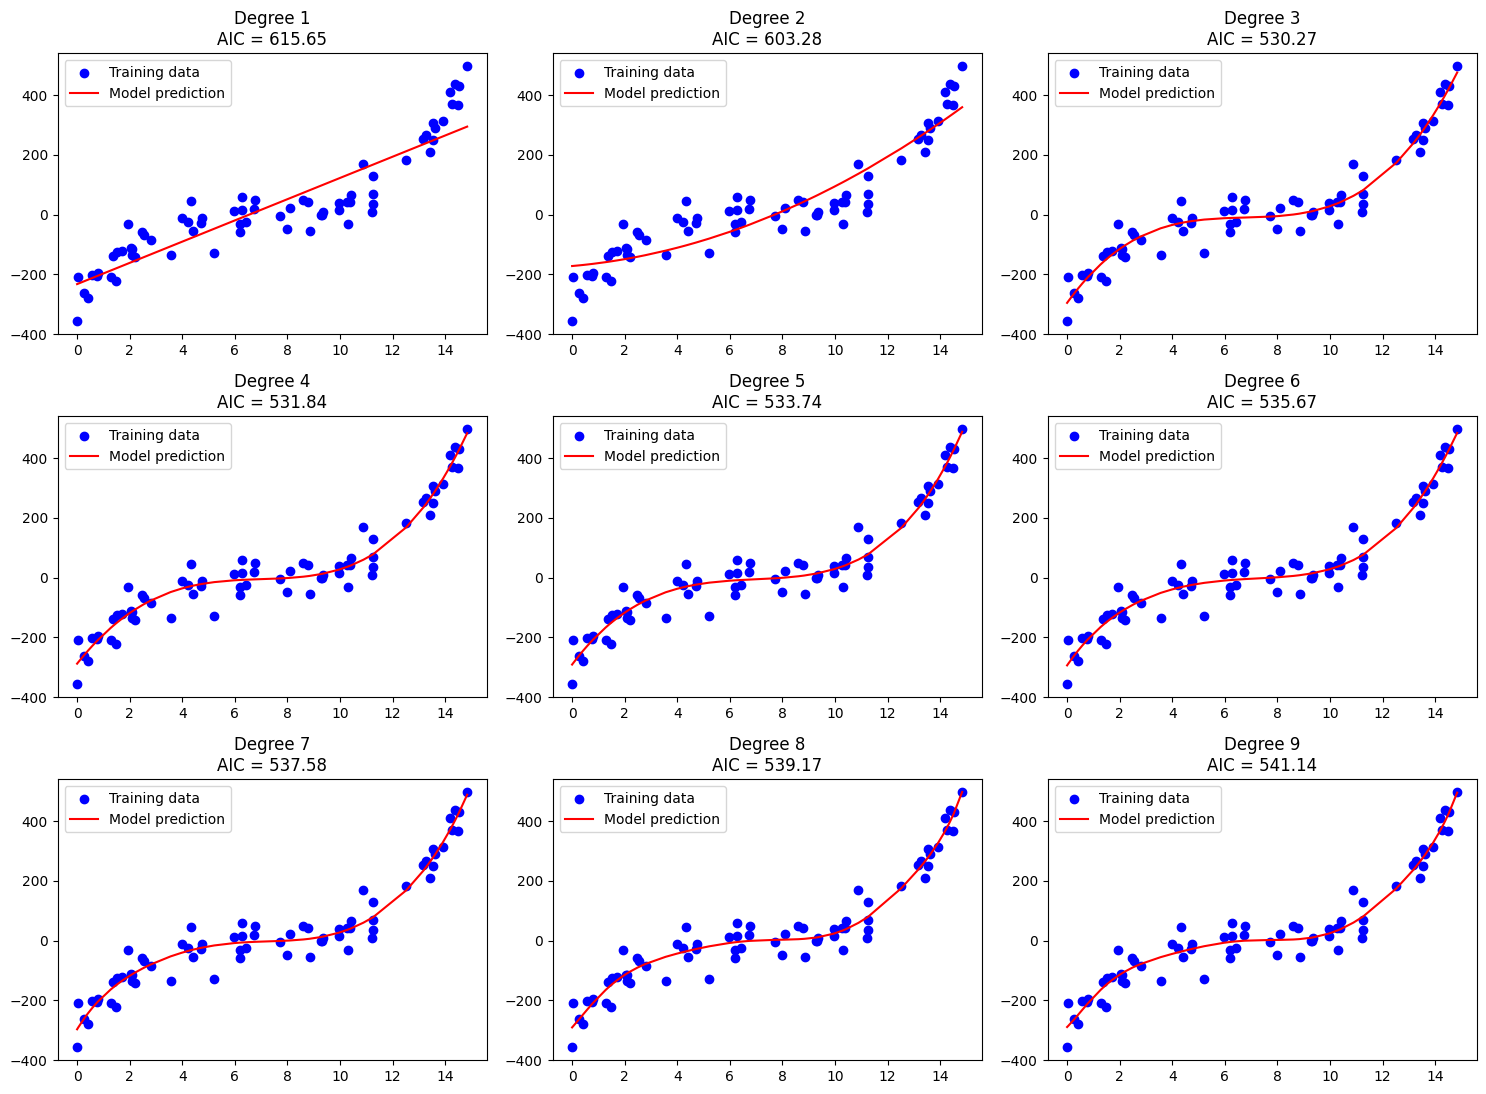

In [730]:
best_aic = sys.float_info.max
best_degree = 10
best_model = None

fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# fitting and evaluating models with degrees 1 ~ 9
for degree in range(1, 10):
    curr_model, predictions, aic = create_and_eval(degree, x_train, y_train)

    if aic < best_aic:
        best_aic = aic
        best_degree = degree
        best_model = curr_model

    # Subplot indexing
    row = int((degree - 1) / 3)
    col = (degree - 1) % 3
    ax = axes[row, col]

    # Scatter plot of training data
    ax.scatter(x_train, y_train, color='blue', label='Training data')

    # Sort x for smooth prediction line
    sorted_idx = np.argsort(x_train)
    sorted_x = x_train[sorted_idx]
    sorted_pred = predictions[sorted_idx]

    # Prediction curve
    ax.plot(sorted_x, sorted_pred, color='red', label='Model prediction')

    # Labels and AIC
    ax.set_title(f'Degree {degree}\nAIC = {aic:.2f}')
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### What are the degree and AIC of the best model? Degree = 3 with an AIC of 530.27


In [731]:
print(f"\nBest Model: Degree = {best_degree}, AIC = {best_aic:.2f}")


Best Model: Degree = 3, AIC = 530.27


## 1.b Answer

Best Model: Degree = 3

AIC = 530.27

RMSE = 41.6988

MAE  = 32.2179

In [732]:
rmse, mae = best_model.test_score(x_train, y_train)

print(f"Best Model: Degree = {best_degree}")
print(f"AIC = {best_aic:.2f}")
print(f"RMSE = {rmse:.4f}")
print(f"MAE  = {mae:.4f}")

Best Model: Degree = 3
AIC = 530.27
RMSE = 41.6988
MAE  = 32.2179


## 1.c Answer

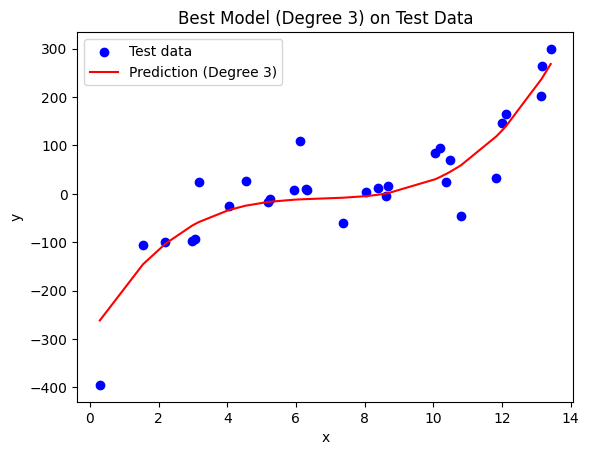

In [733]:
y_pred = best_model.predict(x_test)

# Sort for smooth prediction curve
sorted_idx = np.argsort(x_test)
sorted_x = x_test[sorted_idx]
sorted_pred = y_pred[sorted_idx]

# Plot
plt.scatter(x_test, y_test, color='blue', label='Test data')
plt.plot(sorted_x, sorted_pred, color='red', label=f'Prediction (Degree {best_degree})')
plt.title(f"Best Model (Degree {best_degree}) on Test Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## 1.d Answer: f(x) = -295.86 + 122.50x^1 - 17.81x^2 + 0.88x^3

In [734]:
coeffs = best_model.model.coef_    # array of coefficients (including degree terms)
intercept = best_model.model.intercept_

degree = best_model.degree

equation_terms = []  # intercept term

print(f"f(x) = {intercept:.2f}", end="")

for power in range(1, degree + 1):
    coeff = coeffs[power]
    if coeff > 0:
        temp = "+"
    else:
        temp = "-"
    print(f" {temp} {abs(coeff):.2f}x^{power}", end="")


f(x) = -295.86 + 122.50x^1 - 17.81x^2 + 0.88x^3

## 1.e Answer:

Based on the model selection via the AIC, the best degree is 3. This Suggests that if ever the the data was generated with a polynomial function (although with noise added), it would be of degree 3. 

The functional form of the data-gathering process would be f(x) = -295.86 + 122.50x^1 - 17.81x^2 + 0.88x^3 +/- ε (Error), or something close to that. I believe this to be the case due to the nature of how the data points scatter around the plot:
 - Starts low due to the negative intercept
 - +122.50x makes the prediction line rise steeply as x increases
 - -17.81x^2 counteracts the rise of the prediction line (negative), making the rise slow down. The effect starts overpowering the rise at x = 4
 - +0.88x^3 positive again and makes the prediction line curve up on bigger numbers.

# Item 2

### Data Gathering Function

The data gathering/generation function is defined as: f(x) = 100 + 20*x - 6 * (x**2) + 1 * (x**3) - 0.02 * x ** 4 - 0.004 * x ** 5

This will be the true function on which the values of y (before noises) are generated from

In [735]:
def y_gen(x):
    return 100 + 20*x - 6 * (x**2) + 1 * (x**3) - 0.02 * x ** 4 - 0.004 * x ** 5
    # return - 0.01*(x-1)*(x-2)*(x-3)*(x-4)*(x-5)*(x-6)

### Actual Dataset Generation(Train & Test)

Just a simple function to make dataset generation (with noise) easier. Reusable for train or test with flexible true function

In [736]:
def generate_csv(start_x, end_x, n, noise_max, filename, func):
    x = np.linspace(start_x, end_x, n)
    y_true = func(x)
    noise = np.random.normal(0, noise_max, size=x.shape)
    y_noisy = y_true + noise

    # Saving as a CSV
    df = pd.DataFrame({'x': x, 'y': y_noisy})
    df.to_csv(filename, index=False)


### Actual Toy Data Generation

 - Training has less noise since model should be optimized on this data.
 - Test has higher noise, and more unexpected values. This is to truly test the model on unseen data.


In [737]:
# Soon be commented out to Retain Data

# generate_csv(-2, 10, 70, 15, 'toy_train.csv', y_gen)
# generate_csv(-4, 12, 30, 20, 'toy_test.csv', y_gen) # test data has a set of x values not found in test (x = -4 ~ x = -2 && x = 10 ~ x = 12) More noise

### Loading CSV File

In [738]:

train_df = pd.read_csv("toy_train.csv") 
test_df = pd.read_csv("toy_test.csv") 

x_train = np.array(train_df.iloc[:, 0]) 
y_train = np.array(train_df.iloc[:, 1])

x_test = np.array(test_df.iloc[:, 0])
y_test = np.array(test_df.iloc[:, 1])

### Visualizing the Toy Dataset

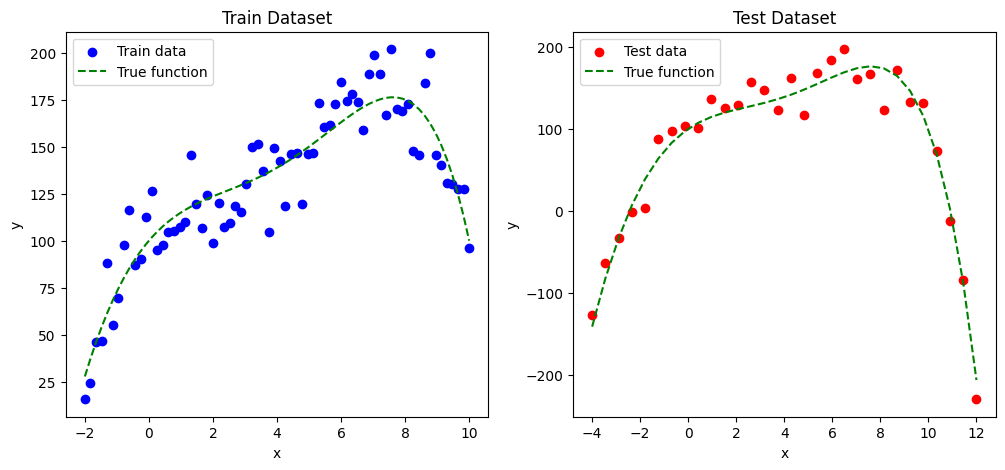

In [739]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(train_df['x'], train_df['y'], color='blue', label='Train data')
axes[0].plot(train_df['x'], y_gen(train_df['x']), 'g--', label='True function')
axes[0].set_title('Train Dataset')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].legend()

axes[1].scatter(test_df['x'], test_df['y'], color='red', label='Test data')
axes[1].plot(test_df['x'], y_gen(test_df['x']), 'g--', label='True function')
axes[1].set_title('Test Dataset')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].legend()

plt.show()

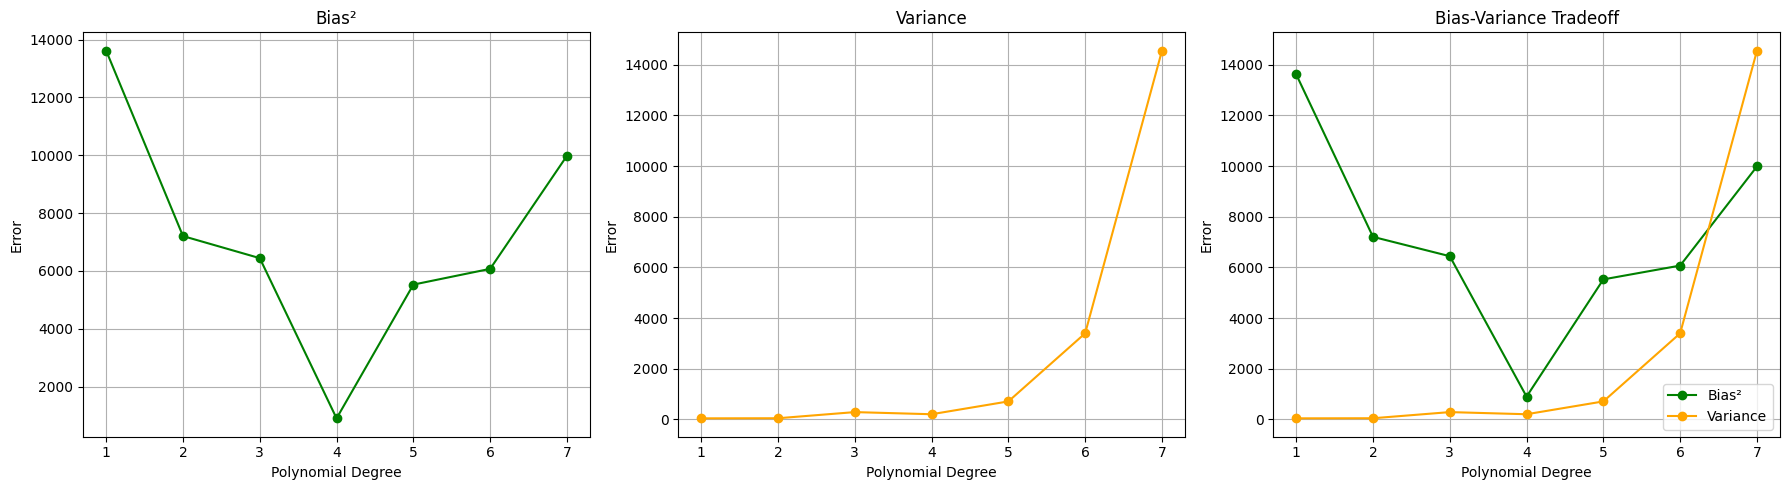

In [740]:
degrees = range(1, 8)
n_bootstraps = 30  # number of bootstrap samples

bias_squared_list = []
variance_list = []

for d in degrees:
    all_preds = []
    
    # Bootstrap loop
    for _ in range(n_bootstraps):
        x_boot, y_boot = resample(x_train, y_train)
        model, _, _ = create_and_eval(d, x_boot, y_boot)
        
        y_pred = model.predict(x_test)
        all_preds.append(y_pred)
    
    all_preds = np.array(all_preds)  # shape: (n_bootstraps, n_test_samples)
    
    # Mean prediction across bootstraps for each test point
    mean_preds = np.mean(all_preds, axis=0)
    
    # Bias²: average squared difference between mean prediction and true y_test
    bias_squared = np.mean((mean_preds - y_test) ** 2)
    
    # Variance: average variance of predictions at each test point
    variance = np.mean(np.var(all_preds, axis=0))
    
    bias_squared_list.append(bias_squared)
    variance_list.append(variance)

# Plotting bias² and variance
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].plot(degrees, bias_squared_list, marker='o', color='green')
axs[0].set_title('Bias²')
axs[0].set_xlabel('Polynomial Degree')
axs[0].set_ylabel('Error')
axs[0].grid(True)

axs[1].plot(degrees, variance_list, marker='o', color='orange')
axs[1].set_title('Variance')
axs[1].set_xlabel('Polynomial Degree')
axs[1].set_ylabel('Error')
axs[1].grid(True)

axs[2].plot(degrees, bias_squared_list, marker='o', label='Bias²', color='green')
axs[2].plot(degrees, variance_list, marker='o', label='Variance', color='orange')
axs[2].set_title('Bias-Variance Tradeoff')
axs[2].set_xlabel('Polynomial Degree')
axs[2].set_ylabel('Error')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()

### Item 2 Explanation

#### About Bias-Variance Tradeoff

Bias-Variance tradeoff dictates that as complexity of a model decreases, the more biased it will be. Due to the model's simplicity, it will always answer in a simple and biased way (assuming all that is bald is stressed, disregarding those that are bald by choice). This bias will naturally impede the model's ability to answer in a varied way, thus decreasing the variance. Bias is measured through the ff: Bias = sqr(Average Prediction - True Value)

On the other hand, increasing the complexity will increase the variety of pattern on which the model might be able to consider. This means that instead of looking at 1 sign (bald head), a model might look into more features before leaning into an answer (wrinkles, age, etc.). This variety of answers stemming from a lot of patterns considered naturally decreases the biases, as the model will have to consider much more nuances for a prediction.

To sum it up, Bias and Variance are both fundamental components of a model's prediction error that we can measure to evaluate our model. And the nice thing about the two is that there is a point in complexity where in we can get the least amount of total error- marking the right amount of complexity for the most efficient model. This separates the possible complexity into two classes: Overfit (Model is too complex, to the point the training data is memorized and failing on unseen data) and Underfit (Model is too simple to learn patterns and just sticks to its very high biases).

#### Toy Dataset Demo

For this item, I have chosen a simple PolynomialRegression model to explore the idea of Bias-Variance tradeoff. The variable that denotes the complexity of a model here is the degrees of the model.

Given that the true function used for generating the dataset is of degree 5, I have chosen to visualize the comparison between Bias^2 and Variance errors of degrees 1 to 7.

Although the degree for minimum variance did not reflect the minimum for bias^2, the minimum total per degree points to a Polynomial Regression with a degree of 5, which agrees with the true function of the data gathering/generation: 100 + 20*x - 6 * (x^2) + 1 * (x^3) - 0.02 * (x ^ 4) - 0.004 * (x ^ 5)

# Item 3

In [741]:
train = pd.read_csv('item_3_train.csv')
test = pd.read_csv('item_3_test.csv')

test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,12.47,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,...,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750,1
1,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,0.05461,...,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589,0
2,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019,0
3,12.40,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,...,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359,1
4,11.54,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,0.06782,...,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,14.64,16.85,94.21,666.0,0.08641,0.06698,0.05192,0.02791,0.1409,0.05355,...,25.44,106.00,831.0,0.1142,0.2070,0.2437,0.07828,0.2455,0.06596,1
110,16.07,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,0.05391,...,24.56,128.80,1223.0,0.1500,0.2045,0.2829,0.15200,0.2650,0.06387,0
111,11.52,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,0.1883,0.06168,...,21.19,80.88,491.8,0.1389,0.1582,0.1804,0.09608,0.2664,0.07809,1
112,14.22,27.85,92.55,623.9,0.08223,0.10390,0.11030,0.04408,0.1342,0.06129,...,40.54,102.50,764.0,0.1081,0.2426,0.3064,0.08219,0.1890,0.07796,1


## 3.a Answer

In [742]:
scaler = StandardScaler()

train = train.dropna()
test = test.dropna()

x_train = train.drop('class', axis=1) 
y_train = train['class']

x_test = test.drop('class', axis=1) 
y_test = test['class']

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)

train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750,1
1,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840,0
2,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490,1
3,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147,1
4,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840,1
451,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097,1
452,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120,1
453,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550,0


## 3.b Answer

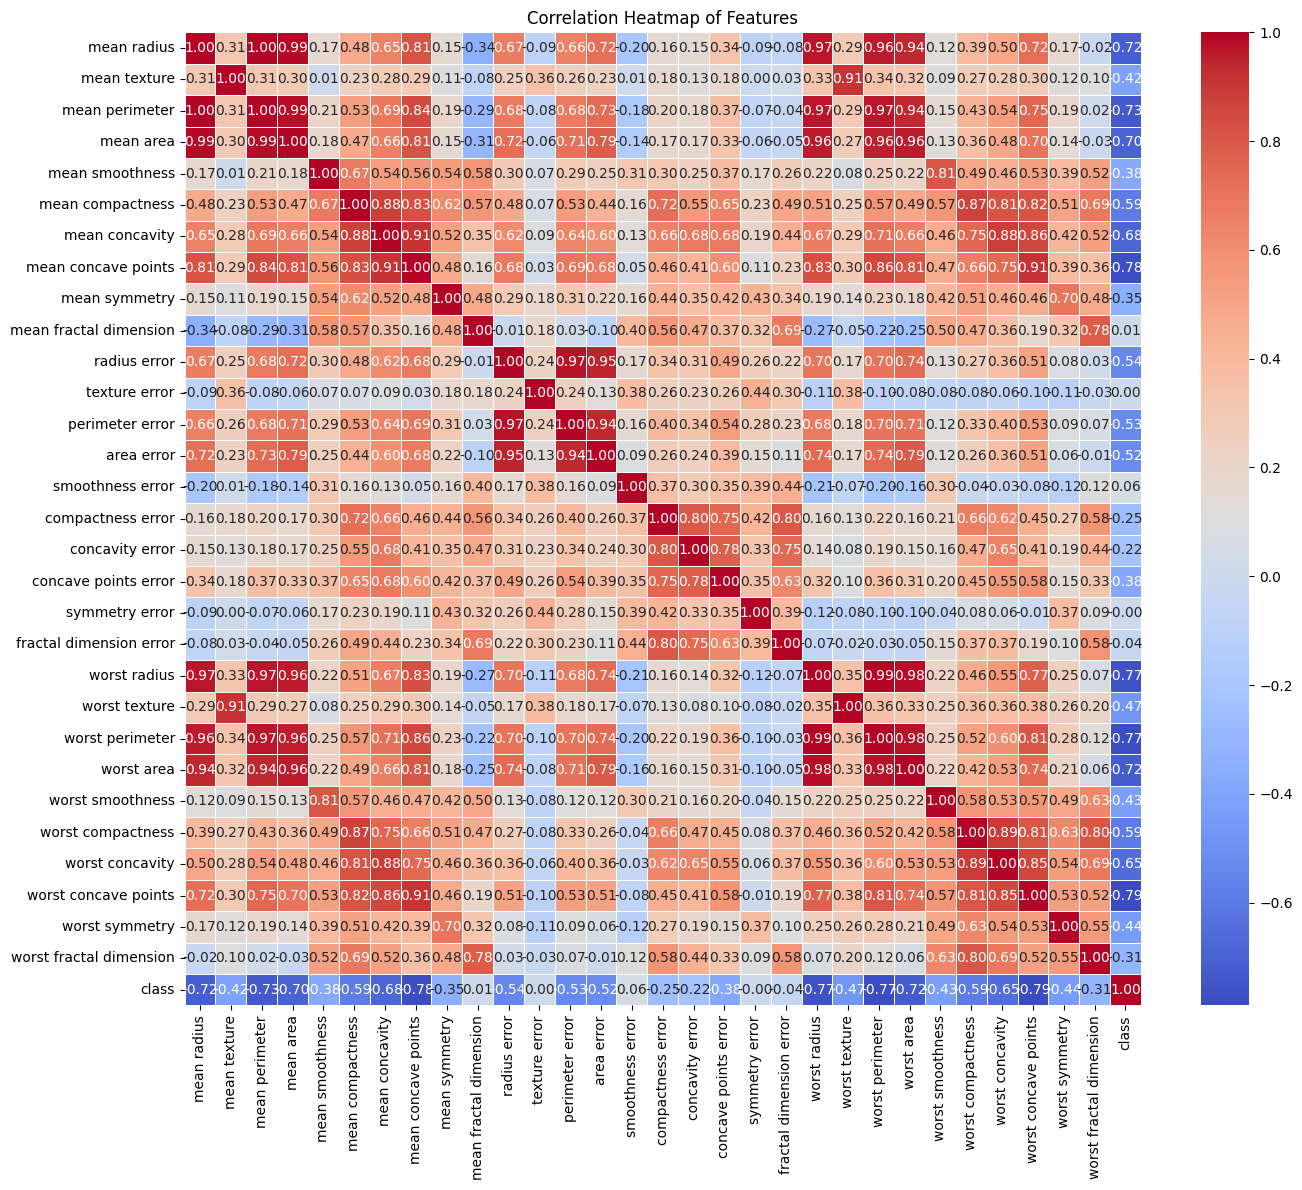

In [743]:
correlation_matrix = train.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

## 3.c Answer

### Fitting a LogisticRegression model

In [744]:
model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, penalty=None)

## 3.d Answer

In [757]:
coefficients = model.coef_[0]
feature_names = x_train.columns if hasattr(x_train, 'columns') else [f'X{i}' for i in range(len(coefficients))]

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
})

feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False).reset_index(drop=True)

print(feature_importance[['Feature', 'Coefficient']])

                    Feature  Coefficient
0          mean compactness   274.940098
1       mean concave points  -266.184736
2              radius error  -259.639462
3           concavity error   246.608093
4           worst concavity  -244.059711
5            worst symmetry  -169.654855
6    mean fractal dimension  -168.017946
7                area error  -167.389401
8            mean concavity  -134.838158
9   fractal dimension error   131.939234
10          perimeter error   115.350114
11             worst radius  -105.871360
12               worst area  -103.736690
13        compactness error   -97.574130
14           symmetry error    95.954186
15         worst smoothness    93.974962
16            worst texture   -91.921276
17         smoothness error   -79.540060
18          worst perimeter    73.018745
19     concave points error   -70.051654
20  worst fractal dimension    59.683836
21            mean symmetry    40.996505
22           mean perimeter    40.020926
23            te

## 3.e Answer

In [ ]:
feature_names = x_train.columns if hasattr(x_train, 'columns') else [f'X{i}' for i in range(x_train.shape[1])]

coefficients = model.coef_[0]

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Importance (|coef|)': np.abs(coefficients)
})

importance_df = importance_df.sort_values(by='Importance (|coef|)', ascending=False).reset_index(drop=True)

print(importance_df)

                    Feature  Coefficient  Importance (|coef|)
0          mean compactness   274.940098           274.940098
1       mean concave points  -266.184736           266.184736
2              radius error  -259.639462           259.639462
3           concavity error   246.608093           246.608093
4           worst concavity  -244.059711           244.059711
5            worst symmetry  -169.654855           169.654855
6    mean fractal dimension  -168.017946           168.017946
7                area error  -167.389401           167.389401
8            mean concavity  -134.838158           134.838158
9   fractal dimension error   131.939234           131.939234
10          perimeter error   115.350114           115.350114
11             worst radius  -105.871360           105.871360
12               worst area  -103.736690           103.736690
13        compactness error   -97.574130            97.574130
14           symmetry error    95.954186            95.954186
15      

## 3.f Answer: Odds decrease by -0.09999999580332472% for each increase in mean texture

In [775]:
coefficients = model.coef_[0]
feature_names = x_train.columns if hasattr(x_train, 'columns') else [f'X{i}' for i in range(len(coefficients))]

# Create a DataFrame with only negative coefficients
negative_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Filter to only negatively associated features
negative_df = negative_df[negative_df['Coefficient'] < 0]

# Rank from most to least associated (i.e., most negative to least negative)
negative_df = negative_df.sort_values(by='Coefficient').reset_index(drop=True)

# Show the ranked features
print(negative_df)

                   Feature  Coefficient
0      mean concave points  -266.184736
1             radius error  -259.639462
2          worst concavity  -244.059711
3           worst symmetry  -169.654855
4   mean fractal dimension  -168.017946
5               area error  -167.389401
6           mean concavity  -134.838158
7             worst radius  -105.871360
8               worst area  -103.736690
9        compactness error   -97.574130
10           worst texture   -91.921276
11        smoothness error   -79.540060
12    concave points error   -70.051654
13            mean texture   -16.986388
14    worst concave points    -8.908160


## 3.d Answer

In [766]:
# Getting the coeff for mean texture
coef_mean_texture = model.coef_[0][x_train.columns.get_loc('mean texture')]

# Calculating odds
odds_ratio = np.exp(coef_mean_texture)

if odds_ratio > 1:
    print(f'Odds increase by {(odds_ratio-1)*.1}% for each increase in mean texture')
else:
     print(f'Odds decrease by {(odds_ratio-1)*.1}% for each increase in mean texture')

Odds decrease by -0.09999999580332472% for each increase in mean texture


## 3.e Answer

In [776]:
y_pred = model.predict(x_test)

# Calculate accuracy by comparing predicted and actual labels
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the logistic regression model on the test set: {accuracy:.4f}")

Accuracy of the logistic regression model on the test set: 0.9035
